# Equilibrium

#### Written for the Paris Quantitative Economics Workshop (September 2022)
#### Author: [John Stachurski](http://johnstachurski.net/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import newton

## The Market



We consider a market for coffee beans.  The price per kilo is $p$.  Total supply at price $p$ is

$$ q_s (p) = b \sqrt{p} $$

and total demand is 

$$ q_d (p) = a \exp(-p) + c, $$

where $a$ and $b$ are positive parameters.

Now let's write routines to compute supply and demand as functions of price and parameters.

We take $a=1$,$b=0.5$ and $c=1$ as "default" parameter values.

In [24]:
def supply(p, b=0.5):
    return b * np.sqrt(p)

def demand(p, a=1, c=1):
    return a * np.exp(-p) + c

Note that these functions are automatically NumPy "universal functions":

In [25]:
supply(2.0)

0.7071067811865476

In [26]:
p_vals = np.linspace(0, 2, num=5)  # linear grid on [1, 2]
supply(p_vals)

array([0.        , 0.35355339, 0.5       , 0.61237244, 0.70710678])

### Exercise 1

Plot both supply and demand as functions of $p$ on the interval $[0, 4]$ at the default parameters.

* Put price on the horizonal axis.  
* Use a legend to label the two functions and be sure to label the axes.  
* Make a rough estimate of the equilibrium price, where demand equals supply.

### Solution

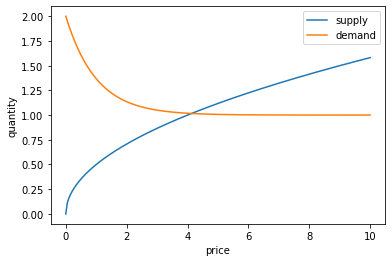

In [29]:
fig, ax = plt.subplots()
p_grid = np.linspace(0, 10, 200)
ax.plot(p_grid, supply(p_grid), label='supply')
ax.plot(p_grid, demand(p_grid), label='demand')
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()
plt.show()

The equilibrium price looks to be about 4.1.

### Exercise 2

Write a function that takes arguments $a, b, c, p$ and returns *excess demand*, which is defined as

$$ e(p) = q_d(p) - q_s(p) $$


### Solution

In [39]:
def excess_demand(p, a=1, b=0.5, c=1):
    return demand(p, a, c) - supply(p, b)

Let's test it:

In [40]:
excess_demand(1.0)

0.8678794411714423

### Exercise 3

Write a class definition that creates a class called `Market` with four methods:

1. An `__init__` method that specifies default parameter values $a=1$, $b=0.5$ and $c=1$.
2. A `demand` method that returns $q_d(p)$ given $p$
3. A `supply` method that returns $q_s(p)$ given $p$
4. An `excess_demand` method that returns $q_d(p) - q_s(p)$ given $p$. 

Using an instance of the class, plot excess demand over the interval from $0.2$ up to $4$.  Also plot a horizontal line at zero.  The equilibrium price is where excess demand crosses zero.

In [41]:
class Market:
    
    def __init__(self, a=1.0, b=0.5, c=1.0):
        self.a, self.b, self.c = a, b, c
        
    def supply(self, p):
        return self.b * np.sqrt(p)
    
    def demand(self, p):
        return self.a * np.exp(-p) + self.c
    
    def excess_demand(self, p):
        return self.demand(p) - self.supply(p)

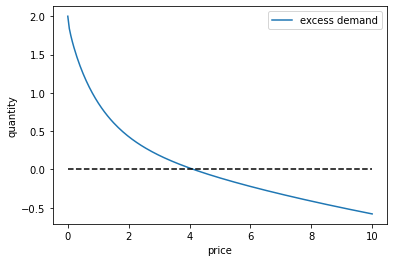

In [42]:
market = Market()

fig, ax = plt.subplots()
p_grid = np.linspace(0, 10, 200)
ax.plot(p_grid, market.excess_demand(p_grid), label='excess demand')
ax.plot(p_grid, np.zeros_like(p_grid), 'k--')
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()
plt.show()

### Exercise 4

Write a function that takes an instance of the `Market` class (i.e., an object `market` constructed via `market = Market()`) and returns a market clearing price via Newton's method.

### Solution

In [43]:
def compute_equilibrium(market, price_init=2.0):
    p_star = newton(market.excess_demand, price_init)
    return p_star

In [44]:
market = Market()
compute_equilibrium(market)

4.129732625744951

### Exercise 5

For $b$ in a grid of 200 values between 0.5 and 1.0, plot the equilibrium price for each $b$.

Does the curve that you plotted slope up or down?  Try to provide an explanation for what you see in terms of market equilibrium.

### Solution

In [45]:
b_grid = np.linspace(0.5, 1.0, 200)
prices = np.empty_like(b_grid)
for i, b in enumerate(b_grid):
    market = Market(b=b)
    prices[i] = compute_equilibrium(market)

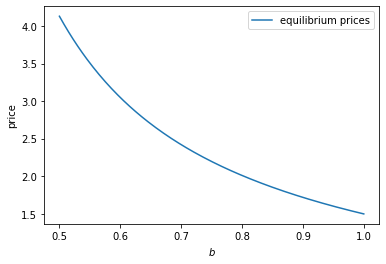

In [46]:
fig, ax = plt.subplots()
ax.plot(b_grid, prices, label="equilibrium prices")
ax.set_xlabel("$b$")
ax.set_ylabel("price")
ax.legend()
plt.show()

The curve slopes down because an increase in $b$ pushes up supply at any given price.  (In other words, the supply curve shifts up.)  

With greater supply, the price tends to fall.